In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
df_train = pd.read_csv('sample_data/train.csv')
df_test = pd.read_csv('sample_data/test.csv')

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
len(df_train.dropna())
columns = list(df_train)
for q in columns:
  print("%s: %d" % (q, df_train[q].isna().sum()))

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


In [ ]:

columns = list(df_test)
for q in columns:
  print("%s: %d" % (q, df_test[q].isna().sum()))

PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


In [ ]:
#make anyone younger than 12 a girl
for age in range(0, len(df_train['Sex'])):
  if df_train['Age'][age] < 12 :
    df_train['Sex' ][age] = 'female'

for age in range(0, len(df_test['Sex'])):
  if df_test['Age'][age] < 12 :
    df_test['Sex' ][age] = 'female'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# change genger to one hot
gender = np.zeros(shape=(len(df_train),1), dtype=int)
df_train['gender'] = gender

for index, row in df_train.iterrows():
  if row['Sex'] == 'female':
    df_train.at[index, 'gender'] = 1

gender = np.zeros(shape=(len(df_test),1), dtype=int)
df_test['gender'] = gender

for index, row in df_test.iterrows():
  if row['Sex']  == 'female':
    df_test.at[index, 'gender'] = 1

In [ ]:
#for age, put the mean age per class
from scipy import stats

first = df_train['Age'].loc[df_train['Pclass'] ==1].mean()
second = df_train['Age'].loc[df_train['Pclass'] ==2].mean()
third = df_train['Age'].loc[df_train['Pclass'] ==3].mean()

#fill in missing age values with the average per Pclass
for age in range(0, len(df_train['Age'])):
  if pd.isnull(df_train['Age'][age]) == True:
    df_train['Age'][age] = np.random.normal(loc=29.7, scale = 14.5)

first = df_test['Age'].loc[df_test['Pclass'] ==1].mean()
second = df_test['Age'].loc[df_test['Pclass'] ==2].mean()
third = df_test['Age'].loc[df_test['Pclass'] ==3].mean()

#fill in missing age values with the average per Pclass
for age in range(0, len(df_test['Age'])):
  if pd.isnull(df_test['Age'][age]) == True:
    df_test['Age'][age] = np.random.normal(loc=29.7, scale = 14.5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Fare in test has one na. Fill it with the average
mean_fare = (df_test['Fare'].sum())/len(df_test['Fare'])
df_test['Fare'] = df_test['Fare'].fillna(mean_fare)

In [ ]:
# make a family column
df_train['family'] = df_train['SibSp'] + df_train['Parch']
df_test['family'] = df_test['SibSp'] + df_test['Parch']

In [ ]:
#Pclass
for index, row in df_train.iterrows():
  if row['Pclass'] == 1:
    df_train.at[index, 'Pclass'] = 1
  else:
    df_train.at[index, 'Pclass'] = 0

#Pclass
for index, row in df_test.iterrows():
  if row['Pclass'] == 1:
    df_test.at[index, 'Pclass'] = 1
  else:
    df_test.at[index, 'Pclass'] = 0

In [ ]:
#make title column
title = np.zeros(shape=(len(df_train),1), dtype=int)
df_train['title'] = title

for index, row in df_train.iterrows():
  split_name = row['Name'].split(', ')
  title = split_name[1].split('.')
  #print(title[0])
  if title[0] == 'Miss':
    df_train.at[index, 'title'] = 4
  if title[0] == 'Master':
    df_train.at[index, 'title'] = 2
  if title[0] == 'Mr':
    df_train.at[index, 'title'] = 1
  if title[0] == 'Mrs':
    df_train.at[index, 'title'] = 3

title = np.zeros(shape=(len(df_test),1), dtype=int)
df_test['title'] = title

for index, row in df_test.iterrows():
  split_name = row['Name'].split(', ')
  title = split_name[1].split('.')
  #print(title[0])
  if title[0] == 'Miss':
    df_test.at[index, 'title'] = 4
  if title[0] == 'Master':
    df_test.at[index, 'title'] = 2
  if title[0] == 'Mr':
    df_test.at[index, 'title'] = 1
  if title[0] == 'Mrs':
    df_test.at[index, 'title'] = 3

In [ ]:
# s = df_train['Cabin']
# df_train['cabin_level'] = s.str.slice(stop=1)
# #df_train['cabin_level'].unique()

# s = df_test['Cabin']
# df_test['cabin_level'] = s.str.slice(stop=1)
# #df_test['cabin_level'].unique()

# level = np.zeros(shape=(len(df_train),1), dtype=int)
# df_train['level'] = level
# level = np.zeros(shape=(len(df_test),1), dtype=int)
# df_test['level'] = level

# for index, row in df_train.iterrows():
#   if row['cabin_level'] == row['cabin_level']:
#     df_train.at[index, 'level'] = ord(row['cabin_level'][0])
#   else:
#     df_train.at[index, 'level'] = 69 #E

# for index, row in df_test.iterrows():
#   if row['cabin_level'] == row['cabin_level']:
#     df_test.at[index, 'level'] = ord(row['cabin_level'][0])
#   else:
#     df_test.at[index, 'level'] = 69 #E


In [ ]:
emb = np.zeros(shape=(len(df_train),1), dtype=int)
df_train['emb'] = emb
emb = np.zeros(shape=(len(df_test),1), dtype=int)
df_test['emb'] = emb

for index, row in df_train.iterrows():
  if row['Embarked'] == 'S':
    df_train.at[index, 'emb'] = 1
  else:
    df_train.at[index, 'emb'] = 0

for index, row in df_test.iterrows():
  if row['Embarked'] == 'S':
    df_test.at[index, 'emb'] = 1
  else:
    df_test.at[index, 'emb'] = 0

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender,family,title,emb
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,0.242424,29.358805,0.523008,0.381594,32.204208,0.392817,0.904602,1.907969,0.722783
std,257.353842,0.486592,0.428790,14.454252,1.102743,0.806057,49.693429,0.488651,1.613459,1.285377,0.447876
min,1.000000,0.000000,0.000000,-5.441653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000,20.000000,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000,0.000000
50%,446.000000,0.000000,0.000000,28.076966,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,0.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,3.000000,1.000000
max,891.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,10.000000,4.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

#seperate the X (features) and Y (prediction)
x_feats = list(df_train.columns)

#Dropping all unneeded variables from df_train
for f in ['PassengerId', 'Survived', 'Sex','Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']:
  x_feats.remove(f)


x_train = df_train[x_feats]
y_train = df_train['Survived']

#use validation
X_train, Y_train, X_val, Y_val = train_test_split(x_train,y_train)


In [ ]:
Y_train.head()

,Pclass,Age,Fare,gender,family,title,emb
82,0,0.328138,7.7875,1,0,4,0
38,0,18.000000,18.0000,1,2,4,1
436,0,21.000000,34.3750,1,4,4,1
664,0,20.000000,7.9250,0,1,1,1
220,0,16.000000,8.0500,0,0,1,1


In [ ]:
len(X_train)

668

In [ ]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, X_val)

accuracy_score(clf.predict(Y_train), Y_val) 

0.820627802690583

In [ ]:
scores = cross_val_score(clf, X_train, X_val, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.11)


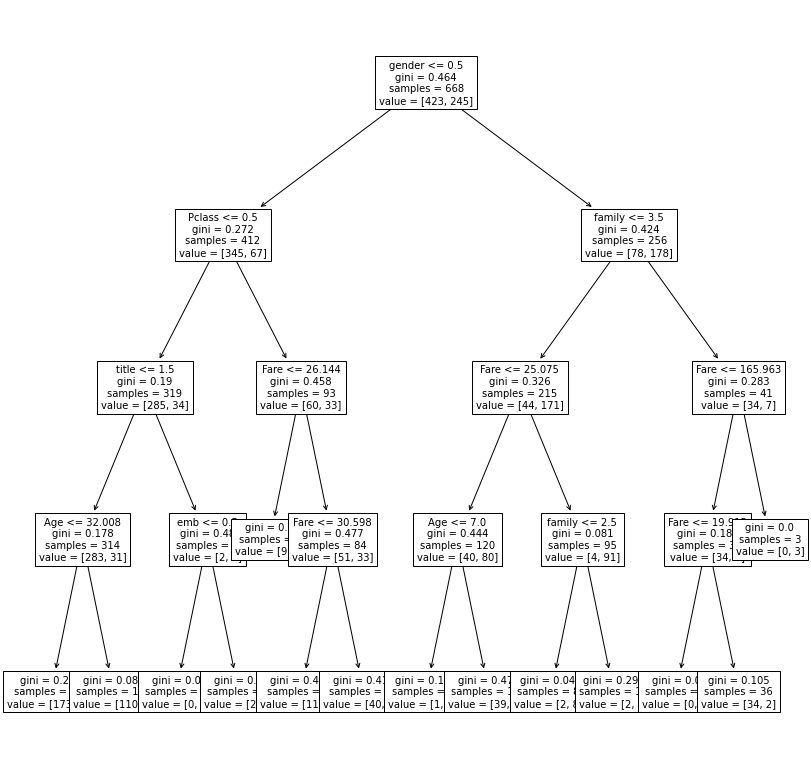

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf, fontsize=10, feature_names=X_train.columns) 
plt.show()

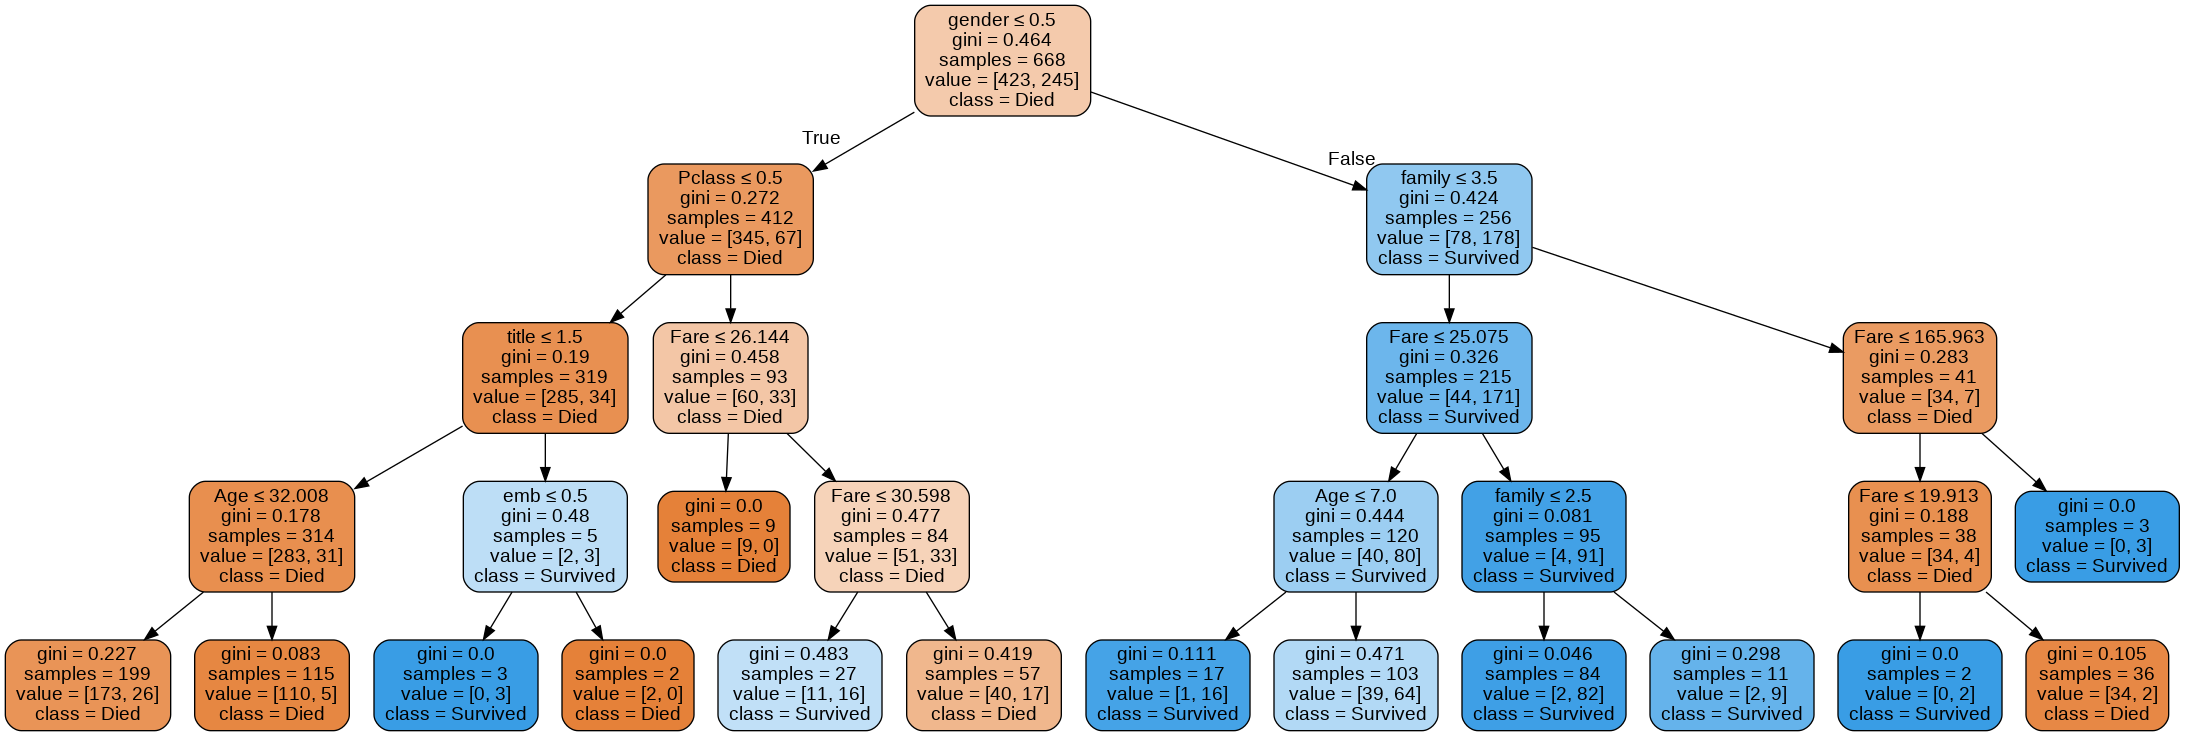

In [ ]:
from IPython.display import Image  
import pydotplus 
import pydot
from sklearn.externals.six import StringIO

training_columns = X_train.columns.tolist()
# training_columns.remove('gender')

dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile,
                     feature_names=X_train.columns,
                     class_names=['Died', 'Survived'],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())


In [ ]:
# Bagging
# Create 5 random trees

accuracies = dict()

for i in range(10):
  clf = DecisionTreeClassifier(max_depth = 4)
  clf.fit(X_train, X_val)
  # print(accuracy_score(clf1.predict(Y_train), Y_val))
  accuracies[clf] = accuracy_score(clf.predict(Y_train), Y_val)
  X_train, Y_train, X_val, Y_val = train_test_split(x_train,y_train)

accuracies

{DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=4, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'): 0.8026905829596412,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=4, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'): 0.8565022421524664,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                      

In [ ]:
{k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse = True, )}

{DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=4, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'): 0.8654708520179372,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=4, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'): 0.8654708520179372,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                      

In [ ]:
# keep top 3, clf1,clf2,clf3
best_1 = list(accuracies.keys())[0]
best_2 = list(accuracies.keys())[3]
best_3 = list(accuracies.keys())[4]

prediction1 = pd.Series(best_1.predict(df_test[x_feats]))
prediction2 = pd.Series(best_2.predict(df_test[x_feats]))
prediction3 = pd.Series(best_3.predict(df_test[x_feats]))
prediction_best = pd.Series(best_3.predict(df_test[x_feats]))

df_preds = pd.concat([prediction1,prediction2,prediction3,prediction_best], axis=1)
df_preds
for index, row in df_preds.iterrows():
  votes = row[0] + row[1] + row[2] 
  # if votes is 3 or 2, then best pred is one, else 0
  if votes == 0 or votes == 1:
    df_preds.at[index, 3] = 0
  else:
    df_preds.at[index, 3] = 1
df_preds

,0,1,2,3
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
413,0,0,0,0
414,1,1,1,1
415,0,0,0,0
416,0,0,0,0


In [ ]:
prediction1 = pd.read_csv('sample_data/submission (21) (1).csv')['Survived']
prediction2 = pd.read_csv('sample_data/submission (25) (1).csv')['Survived']
prediction3 = pd.read_csv('sample_data/submission (27) (1).csv')['Survived']

df_preds = pd.concat([prediction1,prediction2,prediction3], axis=1)

emb = np.zeros(shape=(len(prediction3),1), dtype=int)

df_preds['survived_best'] =emb
for index, row in df_preds.iterrows():
  votes = row[0] + row[1] + row[2] 
  # if votes is 3 or 2, then best pred is one, else 0
  if votes == 0 or votes == 1:
    df_preds.at[index, 'survived_best'] = 0
  else:
    df_preds.at[index, 'survived_best'] = 1
df_preds


,Survived,Survived,Survived,survived_best
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
413,0,0,0,0
414,1,1,1,1
415,0,0,0,0
416,0,0,0,0


In [ ]:
# export
submission = pd.DataFrame(index=df_test.PassengerId)

submission['Survived'] = list(df_preds['survived_best'])
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
submission.reset_index().to_csv('submission.csv', index=False)


In [ ]:
from sklearn.preprocessing import StandardScaler
## Normalize for NN
sc = StandardScaler()
x_train_normalized = sc.fit_transform(X_train)
y_train_normalized = sc.fit_transform(Y_train)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(5, input_dim=7, activation='relu')) #Densely connected: Each neuron is connected all the neurons in the next layer
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_normalized, X_val, epochs=100)

print('Accuracy on testing---')
y_pred_train=model.predict_classes(y_train_normalized)
print(accuracy_score(Y_val,y_pred_train))

print('Accuracy on training---')
y_pred_train=model.predict_classes(x_train_normalized)
print(accuracy_score(X_val,y_pred_train))


Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7031 - accuracy: 0.6213
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.6213
Epoch 3/100
21/21 [==============================] - 0s 983us/step - loss: 0.6811 - accuracy: 0.6213
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.6213
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6213
Epoch 6/100
21/21 [==============================] - 0s 959us/step - loss: 0.6532 - accuracy: 0.6213
Epoch 7/100
21/21 [==============================] - 0s 979us/step - loss: 0.6437 - accuracy: 0.6213
Epoch 8/100
21/21 [==============================] - 0s 938us/step - loss: 0.6341 - accuracy: 0.6213
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.6213
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.6213
E

In [ ]:
len(df_test.dropna())
columns = list(df_test)
for q in columns:
  print("%s: %d" % (q, df_test[q].isna().sum()))

PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 327
Embarked: 0
gender: 0
family: 0
title: 0
cabin_level: 327
level: 0
emb: 0


In [ ]:
x_feats

['Pclass', 'Age', 'Fare', 'gender', 'family', 'title', 'level', 'emb']

In [ ]:
submission = pd.DataFrame(index=df_test.PassengerId)

# prediction = model.predict_classes(sc.fit_transform(df_test[x_feats])).tolist()
prediction = clf.predict(df_test[x_feats])

In [ ]:
# for i in range(len(prediction)):
#   prediction[i] = prediction[i][0]
clf.predict(df_test[x_feats])

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_test[x_feats]

,Pclass,Age,Fare,gender,family,title,emb
0,0,34.500000,7.8292,0,0,1,0
1,0,47.000000,7.0000,1,1,3,1
2,0,62.000000,9.6875,0,0,1,0
3,0,27.000000,8.6625,0,0,1,1
4,0,22.000000,12.2875,1,2,3,1
...,...,...,...,...,...,...,...
413,0,13.733860,8.0500,0,0,1,1
414,1,39.000000,108.9000,1,0,0,0
415,0,38.500000,7.2500,0,0,1,1
416,0,27.523695,8.0500,0,0,1,1


In [ ]:
submission['Survived'] = prediction
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
submission.reset_index().to_csv('submission.csv', index=False)